# 차원축소 Assignment1

## 1) PCA의 과정 차근차근 밟아보기

In [1]:
#기본 모듈 불러오기
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
#설명변수 x1, x2, x3
x1 = [95, 91, 66, 94, 68, 63, 12, 73, 93, 51, 13, 70, 63, 63, 97, 56, 67, 96, 75, 6]
x2 = [56, 27, 25, 1, 9, 80, 92, 69, 6, 25, 83, 82, 54, 97, 66, 93, 76, 59, 94, 9]
x3 = [57, 34, 9, 79, 4, 77, 100, 42, 6, 96, 61, 66, 9, 25, 84, 46, 16, 63, 53, 30]

In [3]:
#   설명변수들을 하나의 행렬로
X = np.stack((x1,x2,x3),axis=0)

In [4]:
X = pd.DataFrame(X.T,columns=['x1','x2','x3'])

In [5]:
# Data를 확인합니다.
X

,x1,x2,x3
0,95,56,57
1,91,27,34
2,66,25,9
3,94,1,79
4,68,9,4
5,63,80,77
6,12,92,100
7,73,69,42
8,93,6,6
9,51,25,96


### 1-1) 먼저 PCA를 시작하기 전 데이터 scaling!! 중요합니다!

https://datascienceschool.net/03%20machine%20learning/02.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html?highlight=%EC%A0%84%EC%B2%98%EB%A6%AC  를 참고하시면 도움이 될거에요

In [6]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#sclaing 후 데이터
X_std = scaler.fit_transform(X)   

In [7]:
X_std

array([[ 1.08573604,  0.02614175,  0.30684189],
       [ 0.93801686, -0.86575334, -0.46445467],
       [ 0.01477192, -0.92726334, -1.30282049],
       [ 1.04880625, -1.66538341,  1.04460382],
       [ 0.08863151, -1.41934339, -1.47049366],
       [-0.09601747,  0.76426183,  0.97753455],
       [-1.97943714,  1.13332186,  1.74883111],
       [ 0.2732805 ,  0.42595679, -0.1961776 ],
       [ 1.01187645, -1.5116084 , -1.40342439],
       [-0.53917504, -0.92726334,  1.61469258],
       [-1.94250735,  0.85652683,  0.44098042],
       [ 0.16249111,  0.82577183,  0.60865359],
       [-0.09601747, -0.03536825, -1.30282049],
       [-0.09601747,  1.28709688, -0.76626636],
       [ 1.15959564,  0.33369178,  1.21227698],
       [-0.35452606,  1.16407687, -0.06203907],
       [ 0.05170172,  0.64124181, -1.06807806],
       [ 1.12266584,  0.11840676,  0.50804969],
       [ 0.3471401 ,  1.19483187,  0.17270336],
       [-2.20101593, -1.41934339, -0.5985932 ]])

In [8]:
features = X_std.T

In [9]:
features

array([[ 1.08573604,  0.93801686,  0.01477192,  1.04880625,  0.08863151,
        -0.09601747, -1.97943714,  0.2732805 ,  1.01187645, -0.53917504,
        -1.94250735,  0.16249111, -0.09601747, -0.09601747,  1.15959564,
        -0.35452606,  0.05170172,  1.12266584,  0.3471401 , -2.20101593],
       [ 0.02614175, -0.86575334, -0.92726334, -1.66538341, -1.41934339,
         0.76426183,  1.13332186,  0.42595679, -1.5116084 , -0.92726334,
         0.85652683,  0.82577183, -0.03536825,  1.28709688,  0.33369178,
         1.16407687,  0.64124181,  0.11840676,  1.19483187, -1.41934339],
       [ 0.30684189, -0.46445467, -1.30282049,  1.04460382, -1.47049366,
         0.97753455,  1.74883111, -0.1961776 , -1.40342439,  1.61469258,
         0.44098042,  0.60865359, -1.30282049, -0.76626636,  1.21227698,
        -0.06203907, -1.06807806,  0.50804969,  0.17270336, -0.5985932 ]])

### 1-2) 다음으로 공분산 행렬을 구합니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html 를 참고하시면 도움이 될거에요

In [10]:
cov_matrix = np.cov(features)

In [11]:
# Scaled data의 covariance입니다.
cov_matrix

array([[ 1.05263158, -0.2037104 , -0.12079228],
       [-0.2037104 ,  1.05263158,  0.3125801 ],
       [-0.12079228,  0.3125801 ,  1.05263158]])

### 1-3) 이제 고유값과 고유벡터를 구합니다

실습코드를 참고해주세요  
즉, 고유치와 해당하는 벡터를 이용한 스펙트럼 분해입니다.  
$A=V \Lambda V^{-1}$  
$A$ : scaled data matrix  
$V$ : eigen vector  
$\Lambda$ : eigen values to diagonal matrix

In [12]:
import numpy.linalg as lin

# 고유치를 구합니다.
eigenvalues = lin.eig(cov_matrix)[0]

# 해당하는 고유벡터를 구합니다.
eigenvectors = lin.eig(cov_matrix)[1]

`eigenvalues` 는 위의 식에서의 $V$입니다.

In [13]:
print(eigenvalues)
print(eigenvectors)

[1.48756162 0.94435407 0.72597904]
[[ 0.47018528 -0.85137353 -0.23257022]
 [-0.64960236 -0.15545725 -0.74421087]
 [-0.59744671 -0.50099516  0.62614797]]


`mat` 은 위의 식에서 $\Lambda$입니다.  

In [14]:
mat = np.empty((3,3))

In [15]:
# 먼저 shape을 만들어 줍니다.
mat

array([[0.47018528, 0.85137353, 0.23257022],
       [0.64960236, 0.15545725, 0.74421087],
       [0.59744671, 0.50099516, 0.62614797]])

In [16]:
# diagonal element
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]

In [17]:
mat

array([[1.48756162, 0.85137353, 0.23257022],
       [0.64960236, 0.94435407, 0.74421087],
       [0.59744671, 0.50099516, 0.72597904]])

### 1-4) 고유값 분해: 고유값 분해의 곱으로 원래 공분산 행렬을 구해봅니다

https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 를 참고해주세요  
즉, $A=V \Lambda V^{-1}$ 를 확인하는 과정입니다.  

In [18]:
(lin.multi_dot([eigenvectors, mat, eigenvectors.T]) - cov_matrix) < 0.001
# 패키지의 계산 과정은 살짝 다르므로 ==으로 검사하지 않았습니다.
# 1-2에서 구했던 공분산과 동일한가요? 
# 네!

array([[ True, False,  True],
       [False, False, False],
       [False, False,  True]])

### 1-5) 마지막으로 고유 벡터 축으로 값을 변환합니다


https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html

In [19]:
eigenvectors.T

array([[ 0.47018528, -0.64960236, -0.59744671],
       [-0.85137353, -0.15545725, -0.50099516],
       [-0.23257022, -0.74421087,  0.62614797]])

In [20]:

def new_coordinates(X,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [X.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new, [X.dot(eigenvectors.T[i])]), axis = 0)
    return new.T

# 모든 고유 벡터 축으로 데이터를 projection한 값입니다

In [21]:
new_coordinates(X_std,eigenvectors)

# 새로운 축으로 변환되어 나타난 데이터들입니다

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

## 2) PCA를 구현해보기

위의 과정을 하나의 함수로 표현해주세요!

1)에서 진행한 과정을 그대로 가져오면 됩니다..! , 

위에서 만든 함수(new_coordinate)도 가져오셔서 사용해도 좋아요!

+하지만 이 함수는 number이라는 인자를 받아서 pca에서 주성분 개수를 고려하도록 합니다!

고유값이 큰 축 순서로 정렬하는 과정 + 주성분 개수 number을 고려해야한다는 점을 유의해서 함수를 정의해주세요


In [22]:
df = pd.DataFrame(new_coordinates(X_std, eigenvectors)) 
df

,0,1,2
0,0.310194,-1.082157,-0.079836
1,1.280924,-0.431326,0.135331
2,1.387664,0.784280,-0.129114
3,0.950875,-1.157371,1.649552
4,1.842224,0.881899,0.114931
5,-1.125637,-0.526803,0.065640
6,-2.711744,0.632901,0.711955
7,-0.031004,-0.200598,-0.503395
8,2.296185,0.076614,0.010872
9,-0.615852,-0.205764,1.826512


In [23]:
from sklearn.preprocessing import StandardScaler

def MYPCA(X,number):
    # 스케일링
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)    
    features = X_std.T     
    
    # 공분산 행렬 계산
    cov_matrix = np.cov(features)
    
    # 고유값과 고유벡터 계산
    
    eigenvalues = lin.eig(cov_matrix)[0]
    eigenvectors = lin.eig(cov_matrix)[1]
    
    
    # 고유값 정렬 및 고유값 크기에 따라 고유벡터도 정렬
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
        
        
    
    # number만큼 주성분 축의 개수 설정
    result = new_coordinates(X_std,eigenvectors)[:,0:number]
    return result     # 새로운 축으로 변환되어 나타난 데이터 return

In [24]:
MYPCA(X,3)

# 새로운 축으로 잘 변환되어서 나타나나요?
# 위에서 했던 PCA랑은 차이가 있을 수 있어요 
# 왜냐하면 위에서는 고유값이 큰 축 순서로 정렬을 안했었거든요

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

## 3) sklearn의 PCA 패키지와 비교해보기

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 를 참고하시면 도움이 될거에요

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3) 
sklearnPCA = pca.fit_transform(X_std) 

In [26]:
sklearnPCA 


array([[-0.31019368, -1.08215716, -0.07983642],
       [-1.28092404, -0.43132556,  0.13533091],
       [-1.38766381,  0.78428014, -0.12911446],
       [-0.95087515, -1.15737142,  1.6495519 ],
       [-1.84222365,  0.88189889,  0.11493111],
       [ 1.12563709, -0.52680338,  0.06564012],
       [ 2.71174416,  0.63290138,  0.71195473],
       [ 0.03100441, -0.20059783, -0.50339479],
       [-2.29618509,  0.07661447,  0.01087174],
       [ 0.61585248, -0.205764  ,  1.82651199],
       [ 1.73320252,  1.29971699,  0.09045178],
       [ 0.82366049, -0.57164535, -0.27123176],
       [-0.75619512,  0.73995175, -0.76710616],
       [ 0.42344386,  0.26555394, -1.41533681],
       [ 0.39581307, -1.64646874,  0.24104031],
       [ 0.88581498,  0.15195119, -0.82271209],
       [-0.24587691,  0.39139878, -1.15801831],
       [-0.14741103, -1.22874561, -0.03110396],
       [ 0.7161265 , -0.56781471, -0.86180345],
       [-0.24475107,  2.39442622,  1.19337361]])

In [27]:
 MYPCA(X,3)
 # 둘이 다른 이유는 eigen vector 구할때 e_1의 부호가 달랐기 때문입니다.  

array([[ 0.31019368, -1.08215716, -0.07983642],
       [ 1.28092404, -0.43132556,  0.13533091],
       [ 1.38766381,  0.78428014, -0.12911446],
       [ 0.95087515, -1.15737142,  1.6495519 ],
       [ 1.84222365,  0.88189889,  0.11493111],
       [-1.12563709, -0.52680338,  0.06564012],
       [-2.71174416,  0.63290138,  0.71195473],
       [-0.03100441, -0.20059783, -0.50339479],
       [ 2.29618509,  0.07661447,  0.01087174],
       [-0.61585248, -0.205764  ,  1.82651199],
       [-1.73320252,  1.29971699,  0.09045178],
       [-0.82366049, -0.57164535, -0.27123176],
       [ 0.75619512,  0.73995175, -0.76710616],
       [-0.42344386,  0.26555394, -1.41533681],
       [-0.39581307, -1.64646874,  0.24104031],
       [-0.88581498,  0.15195119, -0.82271209],
       [ 0.24587691,  0.39139878, -1.15801831],
       [ 0.14741103, -1.22874561, -0.03110396],
       [-0.7161265 , -0.56781471, -0.86180345],
       [ 0.24475107,  2.39442622,  1.19337361]])

## 4) PCA 외 수업에서 다룬 차원축소 기법(FS,GA,<span style="color:red">LDA</span>,SNE 등) 중 택1하여 밑바닥부터 만들어보기

### LDA ( 선형판별분석 )

직접 만든 class와 sklearn의 `LinearDiscriminantAnalysis`을 비교합니다.

$S_W = \displaystyle\sum_{c} S_c$  
$S_c = \displaystyle\sum_{i \in c}(x_i-\bar{x_c})(x_i-\bar{x_c})^T$  
$S_B = \displaystyle\sum_{c} n_c(\bar{x_i}-\bar{x})(\bar{x_i}-\bar{x})^T$  

In [28]:

# 동영상을 보고 만든 LDA Class입니다.

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):  # 실제 계산되는 부분입니다.
        n_features = X.shape[1]    # data변수의 개수입니다.
        class_labels = np.unique(y)  # target value의 unique data수 입니다.

        mean_overall = np.mean(X, axis=0)  # 변수별로 평균을 계산합니다.
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        
        # target의 unique value의 개수만큼 iterate합니다. 
        # 이는 class별로 S_c를 구하는 과정입니다. 
        # 위에 식을 적어 놓았습니다.
        
        
        for c in class_labels: 
            X_c = X[y == c]    # iterate 되고 있는 target value를 가진 data만을 추출하여 계산에 이용합니다. 
            mean_c = np.mean(X_c, axis=0)   # class별로 평균을 구합니다.
            SW += (X_c - mean_c).T.dot((X_c - mean_c))  # S_c이고 이를 S_W에 계속 더해 나갑니다.
            
            # S_B의 계산입니다.
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)


        A = np.linalg.inv(SW).dot(SB)

        # 고유치와 고유벡터입니다.
        eigenvalues, eigenvectors = np.linalg.eig(A)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]  # 순서정렬
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.linear_discriminants = eigenvectors[0 : self.n_components]   # 몇차원으로 줄이지를 받아 해당 차원까지 선택합니다.

    def projection(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터를 받고
iris = load_iris()

# 정규화합니다.
iris_scaled = StandardScaler().fit_transform(iris.data)



In [30]:
# 만든 Class를 2차원으로 줄인다고 선언합니다.
LDA = LDA(2)

# 계산합니다.
LDA.fit(iris_scaled, iris.target)
X_projected = LDA.projection(iris_scaled)

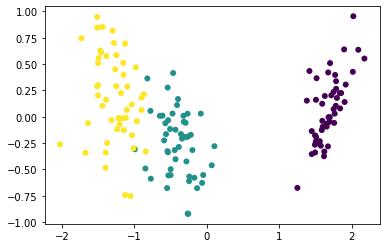

In [31]:
# 시각화 합니다.
X1 = X_projected[:,0]
X2 = X_projected[:,1]

plt.scatter(X1,X2, c = iris.target, edgecolors="none")

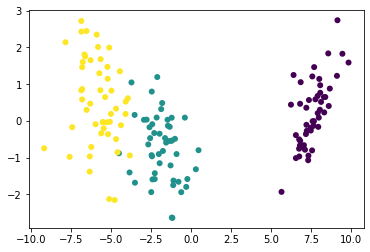

In [32]:
# 같은 데이터를 sklearn을 이용하여 같은 결과가 나오는지 확인합니다.

# LDA 생성
lda = LinearDiscriminantAnalysis(n_components=2)

# 계산
lda.fit(iris_scaled, iris.target)
SK_X_projected = lda.transform(iris_scaled)


SK_X1 = SK_X_projected[:,0]
SK_X2 = SK_X_projected[:,1]

plt.scatter(SK_X1,SK_X2, c = iris.target, edgecolors="none")
